In [1]:
import numpy as np
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random


# The digits dataset
digits = datasets.load_digits()

In [2]:
type(digits)

sklearn.utils.Bunch

In [3]:
(x_tr_img, y_tr_img), (x_te_img, y_te_img) = keras.datasets.mnist.load_data()
# Mnist Dataset
y_tr_img_bin =  np.array(keras.utils.to_categorical(y_tr_img).astype(int).tolist())
y_te_img_bin =  np.array(keras.utils.to_categorical(y_te_img).astype(int).tolist())

# img x
y_tr_img.resize(len(y_tr_img),1) 
y_te_img.resize(len(y_te_img),1) 

print(x_tr_img.shape, x_te_img.shape, y_tr_img.shape, y_te_img.shape)

# vec x
x_tr_vec = np.random.randint(10, size = (x_tr_img.shape[0],2))
x_te_vec = np.random.randint(10, size = (x_te_img.shape[0],2))

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000, 1) (10000, 1)


In [4]:
# word x 
ch2int = dict(zip([c for c in '零一二三四五六七八九'], range(10)))
int2ch = dict(zip( range(10), [c for c in '零一二三四五六七八九']))

word = ['加', 'add', 'Add', 'Plus', 'ha ha']

y_tr_word = np.random.randint(10, size =  x_tr_img.shape[0] )
y_te_word = np.random.randint(10, size =  x_te_img.shape[0] )

x_tr_word_ls =  [random.choice(word)+ " "+int2ch[v] for v in y_tr_word]
x_te_word_ls =  [random.choice(word)+ " "+int2ch[v] for v in y_te_word]


x_tr_word =   np.array([random.choice(word)+ " "+int2ch[v] for v in y_tr_word])
x_te_word =  np.array([random.choice(word)+ " "+int2ch[v] for v in y_te_word])


from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
t = Tokenizer( num_words=20 )
# fit the tokenizer on the documents
t.fit_on_texts(list(x_tr_word) )
 
# summarize what was learned
print(t.word_index)
print(t.document_count)

# integer encode documents
x_tr_word_seq = sequence.pad_sequences( t.texts_to_sequences(x_tr_word ), maxlen= 3)
x_te_word_seq = sequence.pad_sequences( t.texts_to_sequences(x_te_word ), maxlen= 3)


# x_tr_ch = array(['加 一', '加 六', '加 九', ..., '加 一', '加 九', '加 七'], dtype='<U3')
y_tr_word_bin_ls =  keras.utils.to_categorical(y_tr_word).tolist()
y_te_word_bin_ls =  keras.utils.to_categorical(y_te_word).tolist()


y_tr_word_bin =  np.array(y_tr_word_bin_ls)
y_te_word_bin =  np.array(y_te_word_bin_ls)


# 
y_tr_sum = y_tr_img.T + x_tr_vec[:,0]+ 2 * x_tr_vec[:,1] + y_tr_word 
y_te_sum = y_te_img.T + x_te_vec[:,0]+ 2 * x_te_vec[:,1] + y_te_word

y_tr_sum = y_tr_sum.T
y_te_sum = y_te_sum.T

{'ha': 1, 'add': 2, '加': 3, 'plus': 4, '三': 5, '二': 6, '一': 7, '四': 8, '九': 9, '八': 10, '六': 11, '七': 12, '零': 13, '五': 14}
60000


In [5]:
print(t.index_word)
# {'加': 1, '九': 2, '二': 3, '四': 4, '七': 5, '零': 6, '五': 7, '一': 8, '六': 9, '八': 10, '三': 11}
print(t.word_index)
# {'加': 1, '九': 2, '二': 3, '四': 4, '七': 5, '零': 6, '五': 7, '一': 8, '六': 9, '八': 10, '三': 11}

#!pip3 install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc4
#!pip3 install autokeras

{1: 'ha', 2: 'add', 3: '加', 4: 'plus', 5: '三', 6: '二', 7: '一', 8: '四', 9: '九', 10: '八', 11: '六', 12: '七', 13: '零', 14: '五'}
{'ha': 1, 'add': 2, '加': 3, 'plus': 4, '三': 5, '二': 6, '一': 7, '四': 8, '九': 9, '八': 10, '六': 11, '七': 12, '零': 13, '五': 14}


In [6]:
import autokeras as ak

# Initialize the text classifier.
clf = ak.TextClassifier(
    overwrite=True,
    multi_label= True,
    max_trials=1)  # It only tries 1 model as a quick demo.

# Feed the text classifier with training data.
clf.fit( x_tr_word, y_tr_word, epochs = 2 )



Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
text_block_1/bl...|vanilla           |?                 
classification_...|0                 |?                 
text_block_1/ma...|5000              |?                 
text_block_1/co...|False             |?                 
text_block_1/te...|512               |?                 
text_block_1/em...|none              |?                 
text_block_1/em...|64                |?                 
text_block_1/em...|0.25              |?                 
text_block_1/co...|5                 |?                 
text_block_1/co...|1                 |?                 
text_block_1/co...|1                 |?                 
text_block_1/co...|False             |?                 
text_block_1/co...|0                 |?                 
text_block_1/co...|256               |?                 
text_block_1/sp...|global_max        |?                 
text_block_1/de...|1                 |?                 
text

KeyboardInterrupt: 

In [9]:
# Predict with the best model.
predicted_y = clf.predict(x_te_word)

# Evaluate the best model with testing data.
print(clf.evaluate(x_te_word, y_te_word))


AttributeError: 'str' object has no attribute 'shape'

In [10]:
# best model
model_best = clf.export_model()
print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>
model_best.summary()
#inp = model.input                                           # input placeholder
#outputs = [layer.output for layer in model.layers]          # all layer outputs

keras.utils.plot_model(model, "best_model_with_shape_info.png", show_shapes=True)

# 
#  https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer

OSError: SavedModel file does not exist at: ./text_classifier/best_model/{saved_model.pbtxt|saved_model.pb}

In [11]:
x_te_word

['Add 四',
 '加 一',
 'Add 四',
 '加 一',
 'Plus 五',
 'Plus 二',
 'Plus 三',
 'ha ha 七',
 'ha ha 五',
 'Add 三',
 'Add 三',
 'ha ha 二',
 '加 九',
 'Add 二',
 'Add 九',
 'Plus 六',
 'ha ha 一',
 'ha ha 七',
 '加 五',
 'ha ha 九',
 'Plus 五',
 'Add 一',
 'Plus 七',
 'Plus 六',
 'Plus 五',
 'Plus 一',
 '加 三',
 'Add 二',
 'add 九',
 'add 一',
 'ha ha 六',
 '加 八',
 '加 二',
 'Plus 三',
 'ha ha 二',
 'ha ha 二',
 'add 六',
 '加 二',
 'Plus 九',
 'add 六',
 'Plus 六',
 'add 八',
 '加 一',
 'add 五',
 '加 四',
 'ha ha 六',
 'ha ha 八',
 '加 零',
 'ha ha 九',
 'Add 七',
 'Add 八',
 'Plus 四',
 'Add 五',
 'Plus 一',
 '加 三',
 'Plus 六',
 'add 八',
 '加 五',
 'Plus 五',
 '加 六',
 'add 九',
 'ha ha 四',
 'Plus 零',
 '加 八',
 'ha ha 五',
 '加 六',
 'add 三',
 'Add 八',
 'Add 四',
 'add 三',
 'ha ha 八',
 '加 五',
 'ha ha 零',
 'ha ha 八',
 '加 四',
 'ha ha 九',
 'Add 六',
 'Plus 九',
 'Plus 八',
 'Plus 四',
 '加 二',
 'add 八',
 'Plus 一',
 'add 三',
 'ha ha 二',
 'Add 六',
 '加 九',
 'ha ha 九',
 '加 九',
 'Add 三',
 'ha ha 七',
 'ha ha 九',
 '加 七',
 'ha ha 二',
 '加 六',
 'Plus 零',
 'ha ha 七',
 'ha h

  ## 手動建立最佳模型

Vocabulary: ['', '[UNK]', 'ha', 'add', 'plus', '加', '三', '四', '九', '五', '一', '二', '七', '八', '零', '六']


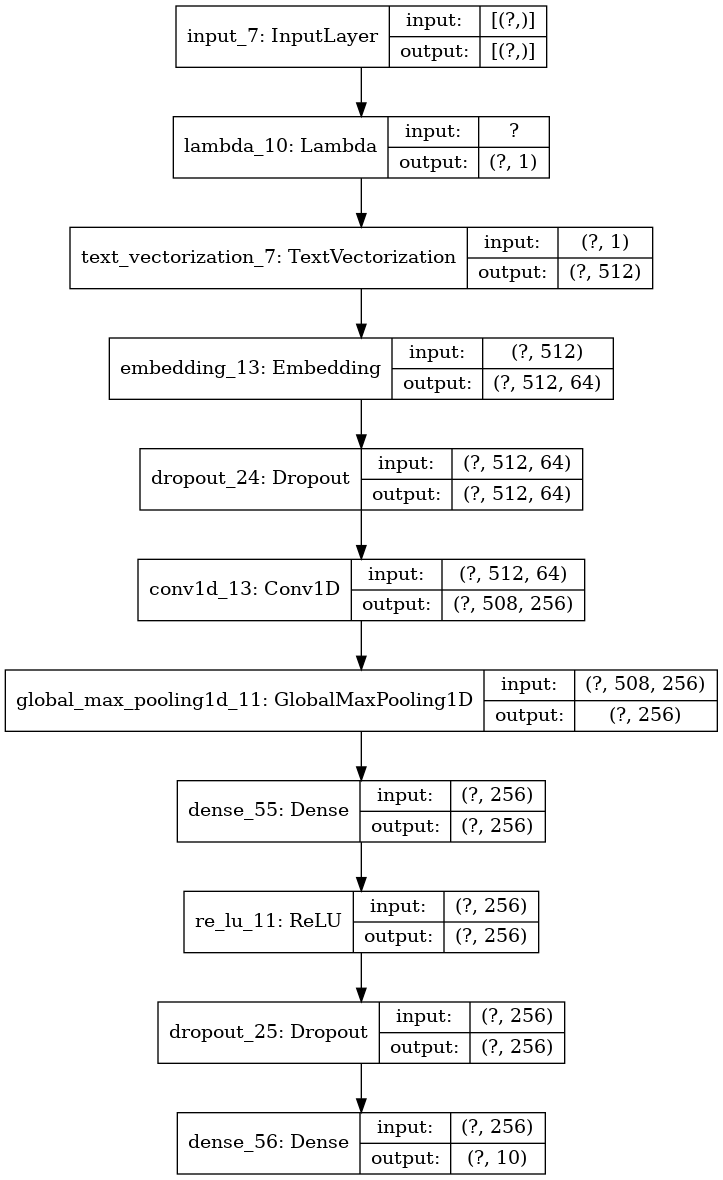

In [49]:
from tensorflow.python.keras.layers import Input, Lambda
from tensorflow.python.keras.backend import expand_dims
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
 
data = tf.constant( x_tr_word)

model_handmake = keras.models.Sequential()

Output_Sequence_Length = 512

vectorize_layer = TextVectorization(
     max_tokens = 20,
     output_mode='int',
      output_sequence_length=Output_Sequence_Length)


vectorize_layer.adapt(data)
# You can retrieve the vocabulary we indexed via get_vocabulary()
vocab = vectorize_layer.get_vocabulary()
print("Vocabulary:", vocab)


model_handmake.add(  tf.keras.Input(shape=(), dtype=tf.string))
model_handmake.add(  Lambda(lambda x: expand_dims(x, axis=1)) )
model_handmake.add(  vectorize_layer)
model_handmake.add(  keras.layers.Embedding( input_dim = Output_Sequence_Length,  output_dim = 64))
model_handmake.add(  keras.layers.Dropout(rate = 0.25 ))
model_handmake.add(  keras.layers.Conv1D(  256, 5, activation = 'relu'))
model_handmake.add(  keras.layers.GlobalMaxPooling1D())
model_handmake.add(  keras.layers.Dense(256, activation = 'linear'))
model_handmake.add(  keras.layers.ReLU())
model_handmake.add(  keras.layers.Dropout(rate = 0.5 ))
model_handmake.add(  keras.layers.Dense(10, activation = 'softmax') )

# continue here
keras.utils.plot_model(model_handmake, "best_model_with_shape_info.png", show_shapes=True)


## 訓練 手建立模型 model_handmake Training

In [50]:
model_handmake.compile(
    loss= "categorical_crossentropy",
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model_handmake.fit(x_tr_word_ls, y_tr_word_bin, batch_size=32, epochs=1 )


1875/1875 [==============================] - 33s 17ms/step - loss: 0.0854 - accuracy: 0.9762


## 使用 Function API 建立模型

Vocabulary: ['', '[UNK]', 'ha', 'add', '加', 'plus', '三', '二', '一', '四', '九', '八', '六', '七', '零', '五']
Model: "best_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 512)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 512, 64)           32768     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 508, 256)          82176     
____________________

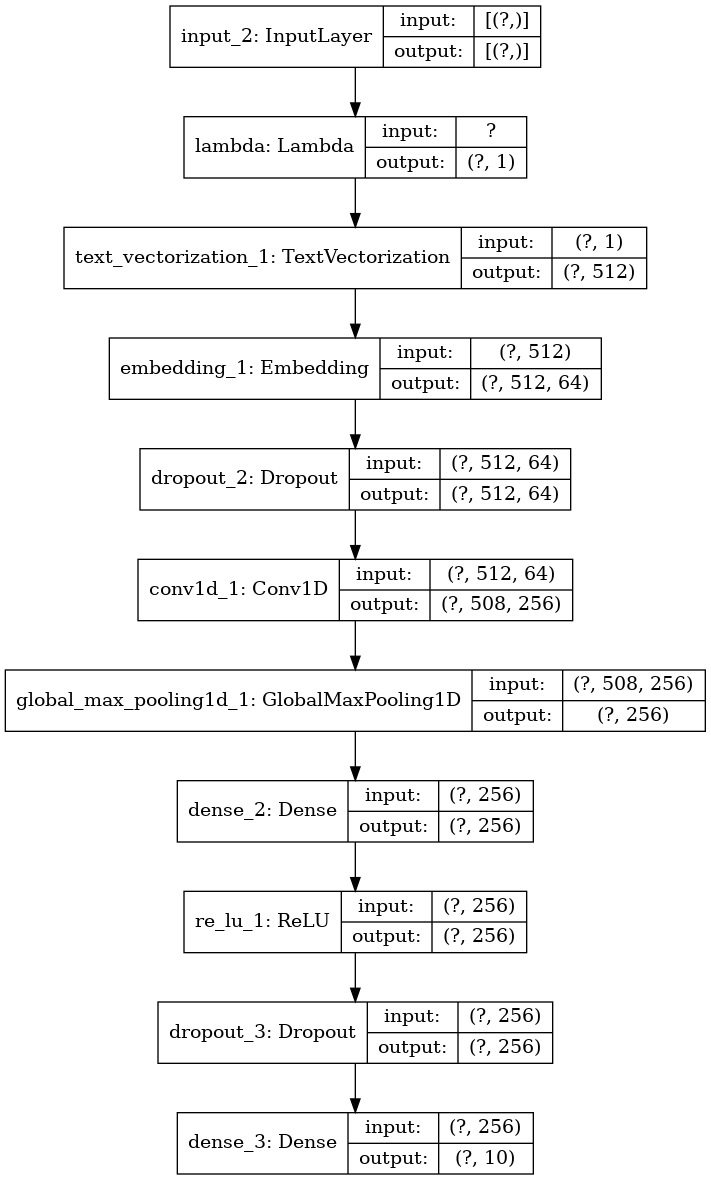

In [7]:
from tensorflow.python.keras.layers import Input, Lambda
from tensorflow.python.keras.backend import expand_dims
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

data = tf.constant( x_tr_word)

model_handmake = keras.models.Sequential()

Output_Sequence_Length = 512

vectorize_layer = TextVectorization(
     max_tokens = 20,
     output_mode='int',
      output_sequence_length=Output_Sequence_Length)

vectorize_layer.adapt(data)
# You can retrieve the vocabulary we indexed via get_vocabulary()
vocab = vectorize_layer.get_vocabulary()
print("Vocabulary:", vocab)


str_ls_inputs = tf.keras.Input(shape=(), dtype=tf.string)
#model_handmake.add(  Lambda(lambda x: expand_dims(x, axis=1)) )
x = Lambda(lambda x: expand_dims(x, axis=1))(str_ls_inputs)
#model_handmake.add(  vectorize_layer)
x = vectorize_layer(x)
#model_handmake.add(  keras.layers.Embedding( input_dim = Output_Sequence_Length,  output_dim = 64))
x =  keras.layers.Embedding( input_dim = Output_Sequence_Length,  output_dim = 64)(x)
#model_handmake.add(  keras.layers.Dropout(rate = 0.25 ))
x = keras.layers.Dropout(rate = 0.25 )(x)
#model_handmake.add(  keras.layers.Conv1D(  256, 5, activation = 'relu'))
x = keras.layers.Conv1D(  256, 5, activation = 'relu')(x)
#model_handmake.add(  keras.layers.GlobalMaxPooling1D())
x = keras.layers.GlobalMaxPooling1D()(x)
#model_handmake.add(  keras.layers.Dense(256, activation = 'linear'))
x = keras.layers.Dense(256, activation = 'linear')(x)
#model_handmake.add(  keras.layers.ReLU())
x = keras.layers.ReLU()(x)
#model_handmake.add(  keras.layers.Dropout(rate = 0.5 ))
x = keras.layers.Dropout(rate = 0.5 )(x)
#model_handmake.add(  keras.layers.Dense(10, activation = 'softmax') )
x = keras.layers.Dense(10, activation = 'softmax')(x)

# continue here

model_my = keras.Model(inputs=str_ls_inputs, outputs=x, name="best_model")
model_my.summary()

keras.utils.plot_model(model_my, "my_FunAPI_model_with_shape_info.png", show_shapes=True)

In [151]:

model_my.compile(
    loss= "categorical_crossentropy",
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

#history =model_my.fit(x_tr_word_ls, y_tr_word_bin_ls, batch_size=32, epochs=1)
history =model_my.fit(x_tr_word, y_tr_word_bin, batch_size=32, epochs=1)


 448/1875 [======>.......................] - ETA: 25s - loss: 1.4287e-05 - accuracy: 1.0000

KeyboardInterrupt: 

## Evaluation model_my

In [57]:
test_scores = model_my.evaluate(x_te_word_ls, y_te_word_bin_ls, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 2s - loss: 2.1201e-07 - accuracy: 1.0000
Test loss: 2.120137025940494e-07
Test accuracy: 1.0


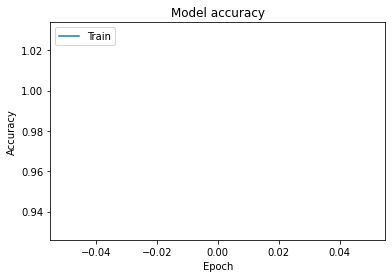

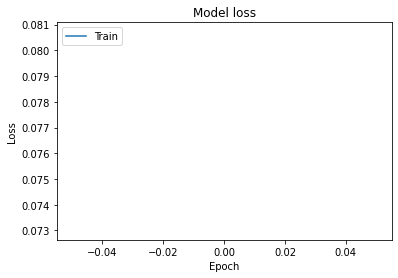

In [58]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Manipulate complex graph topologies

In [8]:
from keras.layers import MaxPooling2D
from keras.layers import Dense, Activation, Dropout, Flatten, LayerNormalization
from keras.layers.normalization import BatchNormalization

img_input = keras.Input(shape=(28, 28, 1 ), name="img")
vec_input = keras.Input(shape=(2 ), name="vec")
word_input = tf.keras.Input(shape=(), dtype=tf.string, name="word")




adapt_data = tf.constant( x_tr_word)
 
Output_Sequence_Length = 512

vectorize_layer_merge = TextVectorization(
     max_tokens = 20,
     output_mode='int',
      output_sequence_length=Output_Sequence_Length)


vectorize_layer_merge.adapt(adapt_data)
# You can retrieve the vocabulary we indexed via get_vocabulary()


x = layers.Conv2D(16, (3, 3), activation="relu")(img_input)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(  pool_size=(2, 2), strides=(2, 2) )(x)
 
x = layers.Conv2D(16, (3, 3), activation="relu")(x)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(  pool_size=(2, 2), strides=(2, 2) )(x)
'''
x = layers.Conv2D(16, (3, 3), activation="relu")(encoder_input)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(  pool_size=(2, 2), strides=(2, 2) )(x)
'''
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)




x_w = Lambda(lambda x: expand_dims(x, axis=1))(word_input)
x_w = vectorize_layer_merge(x_w)
x_w = keras.layers.Embedding( input_dim = Output_Sequence_Length,  output_dim = 64)(x_w)
x_w = keras.layers.Dropout(rate = 0.25 )(x_w)
x_w = keras.layers.Conv1D(  256, 5, activation = 'relu')(x_w)
x_w = keras.layers.GlobalMaxPooling1D()(x_w)
x_w = keras.layers.Dense(256, activation = 'linear')(x_w)
x_w = keras.layers.ReLU()(x_w)
x_w = keras.layers.Dropout(rate = 0.5 )(x_w)
x_w = keras.layers.Dense(10, activation = 'softmax')(x_w)


# 合併
x = layers.concatenate([x, vec_input, x_w]) #
x = layers.Dense(64, activation='relu')(x) 

out1 = layers.Dense(10, activation='softmax', name="out1")(x)
out3 = layers.Dense(10, activation = 'softmax', name="out3")(x)

x = layers.Dense(10, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)
out2 = layers.Dense(1, activation='linear', name="out2")(x)

 
model = keras.Model(
    inputs= [img_input, vec_input, word_input],#
    outputs= [out1, out2, out3] , #
)

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
word (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
img (InputLayer)                [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           word[0][0]                       
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 16)   160         img[0][0]                        
_______________________________________________________________________________________

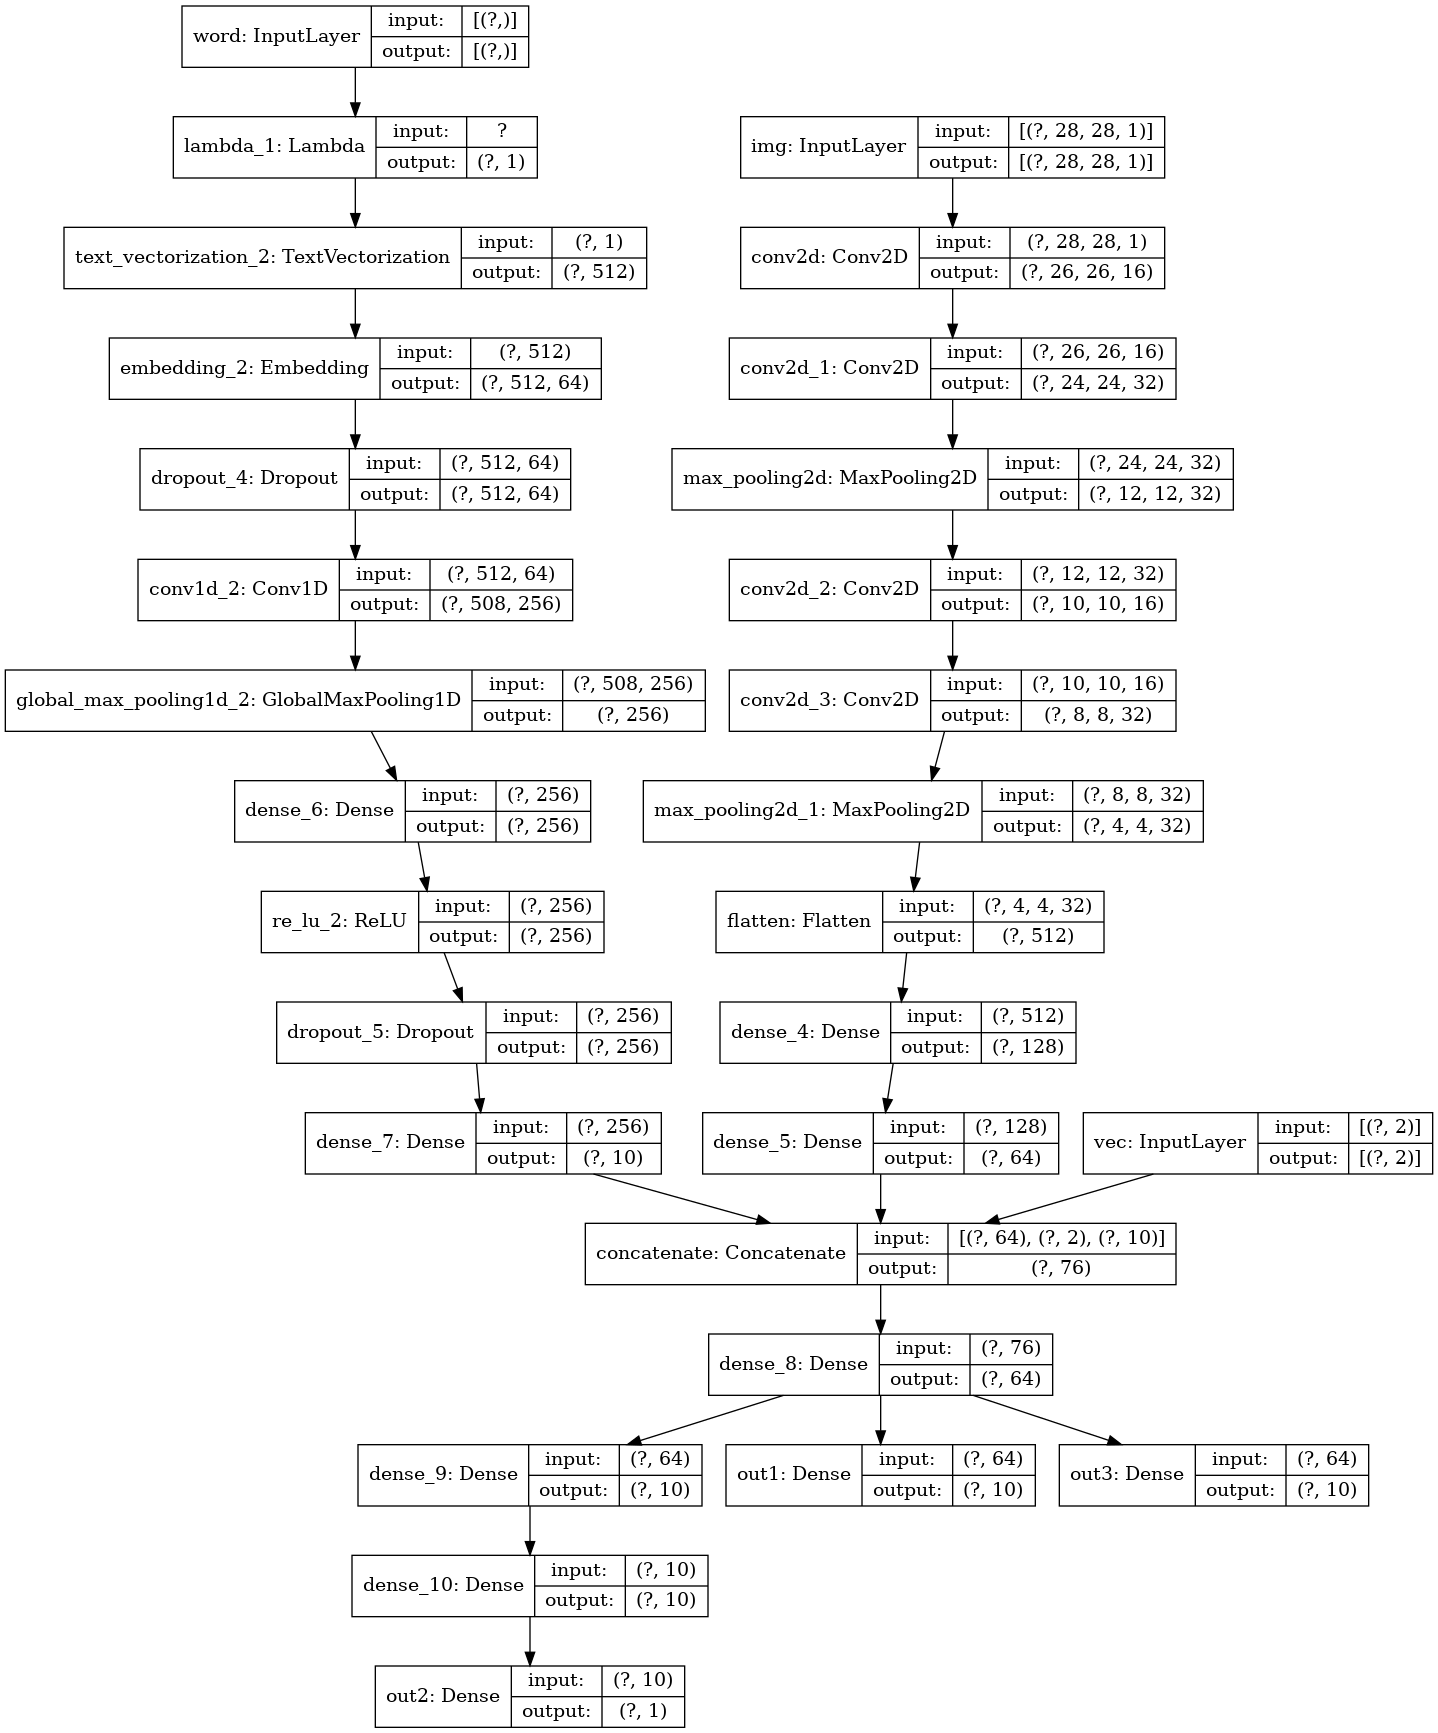

In [9]:
keras.utils.plot_model(model, "img_vev_word_merge_model_with_shape_info.png", show_shapes=True)


In [10]:
model.compile(
    #optimizer=keras.optimizers.RMSprop(1e-3),
    optimizer=keras.optimizers.Adam(),
    loss=[
        keras.losses.CategoricalCrossentropy(),
        keras.losses.MeanSquaredError( ),
        keras.losses.CategoricalCrossentropy(),
    ],
    metrics=['accuracy','MeanAbsoluteError'],
    loss_weights=[1.0, 1.0, 1.0], #
)



history = model.fit(
                {"img": x_tr_img, "vec": x_tr_vec , "word": x_tr_word  }, #
                {"out1":  y_tr_img_bin, "out2": y_tr_sum, "out3": y_tr_word_bin}, #
                epochs=20,
                batch_size=64,
            )

Epoch 1/20
938/938 [==============================] - 38s 40ms/step - loss: 29.8569 - out1_loss: 1.5557 - out2_loss: 25.0487 - out3_loss: 3.2524 - out1_accuracy: 0.7575 - out1_mean_absolute_error: 0.0737 - out2_accuracy: 3.6667e-04 - out2_mean_absolute_error: 3.4777 - out3_accuracy: 0.1447 - out3_mean_absolute_error: 0.1758
Epoch 2/20
938/938 [==============================] - 37s 40ms/step - loss: 2.7465 - out1_loss: 0.1593 - out2_loss: 1.0953 - out3_loss: 1.4919 - out1_accuracy: 0.9536 - out1_mean_absolute_error: 0.0180 - out2_accuracy: 3.6667e-04 - out2_mean_absolute_error: 0.7635 - out3_accuracy: 0.4326 - out3_mean_absolute_error: 0.1462
Epoch 3/20
938/938 [==============================] - 37s 39ms/step - loss: 1.5517 - out1_loss: 0.0918 - out2_loss: 0.6523 - out3_loss: 0.8076 - out1_accuracy: 0.9737 - out1_mean_absolute_error: 0.0098 - out2_accuracy: 3.6667e-04 - out2_mean_absolute_error: 0.5669 - out3_accuracy: 0.7081 - out3_mean_absolute_error: 0.1008
Epoch 4/20
938/938 [======

In [11]:
[img_pred, sum_pred, word_pred ] =model.predict([x_te_img,x_te_vec, x_te_word] )
# Evaluate the best model with testing data.
print(model.evaluate([x_te_img,x_te_vec, x_te_word],  [ y_te_img_bin,   y_te_sum,  y_te_word_bin]))


313/313 [==============================] - 3s 10ms/step - loss: 0.2263 - out1_loss: 0.0492 - out2_loss: 0.1760 - out3_loss: 0.0011 - out1_accuracy: 0.9882 - out1_mean_absolute_error: 0.0028 - out2_accuracy: 2.0000e-04 - out2_mean_absolute_error: 0.2245 - out3_accuracy: 1.0000 - out3_mean_absolute_error: 2.1610e-04
[0.22633828222751617, 0.049244750291109085, 0.1760069876909256, 0.0010865803342312574, 0.9882000088691711, 0.0028340232092887163, 0.00019999999494757503, 0.22447499632835388, 1.0, 0.0002160966832889244]


2 [2 8] 6 [26] [25.987816]
2
Add 六


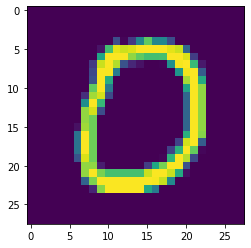

Test Sample Index: 10
Vec Input: [1 1] , Weight Setting=[1,2]
Word Input:"ha ha 七"
Act Sum [10]
Pred Sum [10.022277]
AE <0.5  [0.9574]


In [13]:
idx = 1
print(np.argmax(img_pred, axis = 1)[idx], x_te_vec[idx],np.argmax(word_pred, axis = 1)[idx]
      ,y_te_sum[idx],sum_pred[idx])

plt.imshow(x_te_img[idx])

print(np.argmax(img_pred, axis = 1)[idx])
print(x_te_word[idx])


idx = 10

plt.imshow(x_te_img[idx])
plt.show()

print('Test Sample Index: ' + str(idx))
print( 'Vec Input:', x_te_vec[idx] ,', Weight Setting=[1,2]' )
print( 'Word Input:"'+x_te_word[idx]+'"')
print( 'Act Sum',  y_te_sum[idx] )
print( 'Pred Sum', sum_pred[idx])
print( 'AE <0.5 ' ,sum(abs(y_te_sum-sum_pred)<0.5)/len(y_te_sum))


In [ ]:

for idx in range(5):
    plt.imshow(x_te_img[idx])
    plt.savefig('img'+ str(idx)+'.png')
    plt.show()
    
x_te_vec[:5,:]    

NameError: name 'img_pred' is not defined

In [162]:
x_te_vec[0].shape

(2,)

In [155]:
img_pred[0]

array([14.144028], dtype=float32)

In [188]:
for idx in range(5):
    print(x_te_word[idx])


add 五
add 八
Add 一
Plus 三
Plus 六


In [189]:
for idx in range(5):
    print(y_te_sum[idx])

[21]
[32]
[7]
[10]
[26]


In [210]:
history.history.keys()

dict_keys(['loss', 'out1_loss', 'out2_loss', 'out3_loss', 'out1_accuracy', 'out1_mean_absolute_error', 'out2_accuracy', 'out2_mean_absolute_error', 'out3_accuracy', 'out3_mean_absolute_error'])

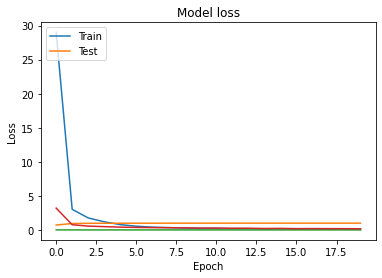

In [212]:

plt.plot(history.history['loss'])
plt.plot(history.history['out1_accuracy'])
plt.plot(history.history['out2_accuracy'])
plt.plot(history.history['out2_mean_absolute_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

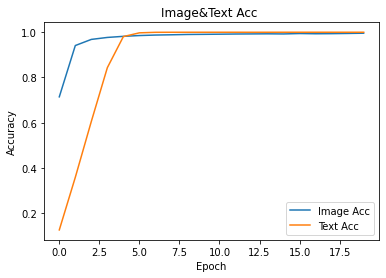

In [221]:
 
plt.plot(history.history['out1_accuracy'])
plt.plot(history.history['out3_accuracy'])
plt.title('Image&Text Acc ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Image Acc', 'Text Acc'], loc='lower right')
plt.show()